In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import chardet
import time
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('results.csv', sep=',', encoding='latin-1', on_bad_lines='skip', low_memory=False)
analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]


In [3]:
#Análise com maior número de FALSE POSITIVE
op = "FALSE POSITIVE"
result = ""
val = -1

for i in analysis:
    base = df[df[i] == op]
    if (base[i].count() > val):
        val = base[i].count()
        result = i

print("Análise com maior quantidade de", op, ":",result, "=", val)

Análise com maior quantidade de FALSE POSITIVE : OR Result = 26


In [4]:
#Análise com maior resultado entre todas as opções
options = ["FALSE POSITIVE", "FALSE NEGATIVE", "TRUE POSITIVE", "TRUE NEGATIVE"]
for op in options:
    result = ""
    val = -1

    for i in analysis:
        base = df[df[i] == op]
        if (not base[i].empty and base[i].count() > val):
            val = base[i].count()
            result = i

    print("Análise com maior quantidade de", op, ":",result, "=", val)

Análise com maior quantidade de FALSE POSITIVE : OR Result = 26
Análise com maior quantidade de FALSE NEGATIVE : OA Inter Result = 29
Análise com maior quantidade de TRUE POSITIVE : OR Result = 20
Análise com maior quantidade de TRUE NEGATIVE : OA Inter Result = 62


In [5]:
#Análise com menor resultado entre todas as opções
options = ["FALSE POSITIVE", "FALSE NEGATIVE", "TRUE POSITIVE", "TRUE NEGATIVE"]

for op in options:
    result = ""
    val = 10000
    for i in analysis:
        base = df[df[i] == op]

        if (not base[i].empty and base[i].count() < val):
            val = base[i].count()
            result = i

    print("Análise com menor quantidade de", op, ":",result, "=", val)

Análise com menor quantidade de FALSE POSITIVE : OA Inter Result = 4
Análise com menor quantidade de FALSE NEGATIVE : OR Result = 13
Análise com menor quantidade de TRUE POSITIVE : OA Inter Result = 4
Análise com menor quantidade de TRUE NEGATIVE : DF Inter Result = 45


In [6]:
base = df[df['Confluence Inter'] == "TRUE POSITIVE"]
print(base['Confluence Inter'].head)

<bound method NDFrame.head of Series([], Name: Confluence Inter, dtype: object)>


In [7]:
def compareTwoAnalysis(a1, a2, list1, list2):
    op = ["TRUE POSITIVE", "TRUE NEGATIVE", "FALSE POSITIVE", "FALSE NEGATIVE"]

    print("Comparando",a1, "com", a2)
    
    TPIgual = True
    TNIgual = True
    for (l1, l2) in zip(list1, list2):
        if (l1 == "TRUE POSITIVE" and l1 != l2):
            TPIgual = False
        if (l1 == "TRUE NEGATIVE" and l1 != l2):
            TNIgual = False


    if (TPIgual and TNIgual and (list2.count("TRUE POSITIVE") > list1.count("TRUE POSITIVE") or 
                                 list2.count("TRUE NEGATIVE") > lista1.count("TRUE NEGATIVE"))):
        print("Melhor", a2)
    elif (TPIgual and TNIgual and (list2.count("TRUE POSITIVE") == list1.count("TRUE POSITIVE") or 
                                   list2.count("TRUE NEGATIVE") == lista1.count("TRUE NEGATIVE"))):
        print("Ficar com a mais rápida!")
    else:
        print("Ficar com o OU!")

    listaOR = []
    for (l1, l2) in zip(lista1, lista2):
        if ("NEGATIVE" in l1 and "NEGATIVE" in l2):
            if ("TRUE NEGATIVE" in l1 and "TRUE NEGATIVE" in l2):
                listaOR.append("TRUE NEGATIVE")
            elif ("FALSE NEGATIVE" in l1 and "FALSE NEGATIVE" in l2):
                listaOR.append("FALSE NEGATIVE")
        else:
            if ("TRUE POSITIVE" in l1 or "TRUE POSITIVE" in l2):
                listaOR.append("TRUE POSITIVE")
            else:
                listaOR.append("FALSE POSITIVE")
    

    cont1 = {"TRUE POSITIVE":0, "TRUE NEGATIVE":0, "FALSE POSITIVE":0, "FALSE NEGATIVE":0}

    for i in list1:
        cont1[i] = cont1[i] + 1

    cont2 = {"TRUE POSITIVE":0, "TRUE NEGATIVE":0, "FALSE POSITIVE":0, "FALSE NEGATIVE":0}

    for i in list2:
        cont2[i] = cont2[i] + 1

    contOR = {"TRUE POSITIVE":0, "TRUE NEGATIVE":0, "FALSE POSITIVE":0, "FALSE NEGATIVE":0}

    for i in listaOR:
        contOR[i] = contOR[i] + 1

    print(cont1)
    print(cont2)
    print(contOR)

In [8]:
analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]

a1 = df["DF Inter Result"]
lista1 = []
for i in a1:
    if (i != "not-found" and "nan" not in str(i)):
        lista1.append(i)

a2 = df["Confluence Inter Result"]
lista2 = []
for i in a2:
    if (i != "not-found" and "nan" not in str(i)):
        lista2.append(i)


compareTwoAnalysis("DF Inter Result", "Confluence Inter Result", lista1, lista2)

Comparando DF Inter Result com Confluence Inter Result
Ficar com o OU!
{'TRUE POSITIVE': 11, 'TRUE NEGATIVE': 45, 'FALSE POSITIVE': 21, 'FALSE NEGATIVE': 22}
{'TRUE POSITIVE': 6, 'TRUE NEGATIVE': 48, 'FALSE POSITIVE': 18, 'FALSE NEGATIVE': 27}
{'TRUE POSITIVE': 12, 'TRUE NEGATIVE': 43, 'FALSE POSITIVE': 23, 'FALSE NEGATIVE': 21}


In [9]:
#Comparando todas as análises

analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]

for i in range(len(analysis)):
    for j in range(i+1, len(analysis)):
        a1 = df[analysis[i]]
        lista1 = []
        for a in a1:
            if (a != "not-found" and "nan" not in str(a)):
                lista1.append(a)

        a2 = df[analysis[j]]
        lista2 = []
        for b in a2:
            if (b != "not-found" and "nan" not in str(b)):
                lista2.append(b)


        compareTwoAnalysis(analysis[i], analysis[j], lista1, lista2)


Comparando OR Result com Confluence Inter Result
Ficar com o OU!
{'TRUE POSITIVE': 20, 'TRUE NEGATIVE': 55, 'FALSE POSITIVE': 26, 'FALSE NEGATIVE': 13}
{'TRUE POSITIVE': 6, 'TRUE NEGATIVE': 48, 'FALSE POSITIVE': 18, 'FALSE NEGATIVE': 27}
{'TRUE POSITIVE': 26, 'TRUE NEGATIVE': 25, 'FALSE POSITIVE': 30, 'FALSE NEGATIVE': 4}
Comparando OR Result com OA Inter Result
Ficar com o OU!
{'TRUE POSITIVE': 20, 'TRUE NEGATIVE': 55, 'FALSE POSITIVE': 26, 'FALSE NEGATIVE': 13}
{'TRUE POSITIVE': 4, 'TRUE NEGATIVE': 62, 'FALSE POSITIVE': 4, 'FALSE NEGATIVE': 29}
{'TRUE POSITIVE': 24, 'TRUE NEGATIVE': 29, 'FALSE POSITIVE': 24, 'FALSE NEGATIVE': 4}
Comparando OR Result com DF Inter Result
Ficar com o OU!
{'TRUE POSITIVE': 20, 'TRUE NEGATIVE': 55, 'FALSE POSITIVE': 26, 'FALSE NEGATIVE': 13}
{'TRUE POSITIVE': 11, 'TRUE NEGATIVE': 45, 'FALSE POSITIVE': 21, 'FALSE NEGATIVE': 22}
{'TRUE POSITIVE': 31, 'TRUE NEGATIVE': 21, 'FALSE POSITIVE': 31, 'FALSE NEGATIVE': 2}
Comparando OR Result com PDG Result
Ficar co

In [10]:
#Algoritmo
#Se todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e A2 tem pelo 
#menos um TP ou TN a mais que A1, o algoritmo indica que a gente deve ficar apenas com A2

#Se todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e A2 não tem 
#nenhum TP ou TN a mais que A1, o algoritmo indica que a gente deve ficar com a mais rápida entre A1 e A2

#Se nem todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e vice-versa, 
#o algoritmo sugere a gente ficar com o OR de A1 e A2

op = ["TRUE POSITIVE", "TRUE NEGATIVE", "FALSE POSITIVE", "FALSE NEGATIVE"]

lista1 = []
for i in df["DF Inter Result"]:
    if (i != "not-found" and "nan" not in str(i)):
                lista1.append(i)

lista2 = []
for i in df["Confluence Inter Result"]:
    if (i != "not-found" and "nan" not in str(i)):
                lista2.append(i)

TPIgual = True
TNIgual = True
for (l1, l2) in zip(lista1, lista2):
    if (l1 == "TRUE POSITIVE" and l1 != l2):
        TPIgual = False
    if (l1 == "TRUE NEGATIVE" and l1 != l2):
        TNIgual = False


if (TPIgual and TNIgual and (lista2.count("TRUE POSITIVE") > lista1.count("TRUE POSITIVE") or lista2.count("TRUE NEGATIVE") > lista1.count("TRUE NEGATIVE"))):
    print("Analise 2!")
elif (TPIgual and TNIgual and (lista2.count("TRUE POSITIVE") == lista1.count("TRUE POSITIVE") or lista2.count("TRUE NEGATIVE") == lista1.count("TRUE NEGATIVE"))):
    print("Ficar com a mais rápida!")
else:
    print("Vamos optar pelo OU!")


Vamos optar pelo OU!


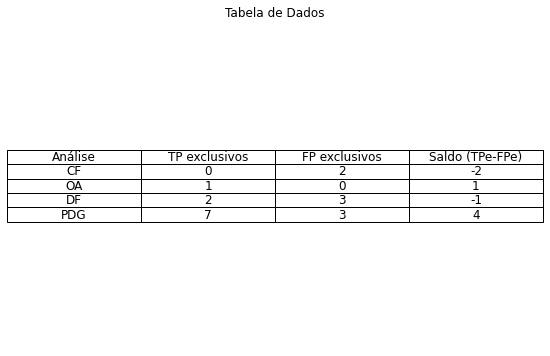

In [11]:
#Cálculo de TP e FP exclusivo para cada análise

def check_exclusivo(op1, op2, op3, op4, val):
    if (val in op1 and (val not in op2 and val not in op3 and val not in op4)):
        return 1
    return 0

analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]

cf_tp, df_tp, oa_tp, pdg_tp = 0, 0, 0, 0

cf_fp, df_fp, oa_fp, pdg_fp = 0, 0, 0, 0

for (cf, df, oa, pdg) in zip(df["Confluence Inter Result"], df["DF Inter Result"], df["OA Inter Result"], df["PDG Result"]):
    if ("nan" not in str(cf)):

        cf_tp = cf_tp + check_exclusivo(cf, df, oa, pdg, "TRUE POSITIVE")
        df_tp = df_tp + check_exclusivo(df, cf, oa, pdg, "TRUE POSITIVE")
        oa_tp = oa_tp + check_exclusivo(oa, df, cf, pdg, "TRUE POSITIVE")
        pdg_tp = pdg_tp + check_exclusivo(pdg, cf, df, oa, "TRUE POSITIVE")

        cf_fp = cf_fp + check_exclusivo(cf, df, oa, pdg, "FALSE POSITIVE")
        df_fp = df_fp + check_exclusivo(df, cf, oa, pdg, "FALSE POSITIVE")
        oa_fp = oa_fp + check_exclusivo(oa, df, cf, pdg, "FALSE POSITIVE")
        pdg_fp = pdg_fp + check_exclusivo(pdg, cf, df, oa, "FALSE POSITIVE")

data = {
    'Análise': ['CF', 'OA', 'DF', 'PDG'],
    'TP exclusivos': [cf_tp, oa_tp, df_tp,  pdg_tp],
    'FP exclusivos': [cf_fp, oa_fp, df_fp,  pdg_fp]
}

dframe = pd.DataFrame(data)
dframe['Saldo (TPe-FPe)'] = dframe['TP exclusivos'] - dframe['FP exclusivos']

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=dframe.values, colLabels=dframe.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Tabela de Dados")
plt.savefig('tabela.png', bbox_inches='tight', pad_inches=0.5)

